**About Dataset**

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.
He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.


I am doing an exploratory analysis of the data, cleaning the data and visualizing the data, and some machine learning algorithms have been used.



In [74]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [75]:
data=pd.read_csv('train.csv')
data.head(n=4)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2


In [76]:
data.tail(n=4)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [77]:
data.sample(n=10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1038,1122,0,2.8,0,0,0,28,0.6,184,3,...,1578,1963,1402,14,10,3,0,1,0,1
1670,1569,1,1.6,1,4,1,54,0.9,190,4,...,371,665,3905,6,2,4,1,0,0,3
557,1519,0,2.1,0,0,0,32,0.7,200,1,...,168,1239,2912,11,10,15,1,1,0,2
1990,1617,1,2.4,0,8,1,36,0.8,85,1,...,743,1426,296,5,3,7,1,0,0,0
1682,1996,1,2.8,1,0,1,7,0.1,138,5,...,937,1083,1258,17,14,16,1,0,0,1
1685,1521,1,1.6,0,5,1,62,0.3,143,1,...,678,1630,3555,5,2,19,1,0,0,3
1683,1083,1,2.0,0,3,0,41,0.7,158,5,...,937,1164,1543,18,3,10,0,0,1,1
395,1896,0,0.5,1,8,1,7,0.4,141,2,...,447,794,3684,9,7,18,1,0,0,3
1279,1602,0,0.6,0,12,0,58,0.4,170,1,...,1259,1746,3622,17,2,17,0,1,1,3
240,633,1,2.2,0,0,1,49,0.1,139,8,...,529,1009,3560,11,1,16,1,1,1,2


In [78]:
data.shape

(2000, 21)

In [79]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [80]:
data.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [81]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [83]:
data.isnull().any()

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool

In [84]:
#To check the None Values
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [85]:
#To check duplicated Rows
data.duplicated().sum()

0

In [86]:
data.groupby('price_range')['int_memory','battery_power'].mean()

<ipython-input-86-27c5024811e5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('price_range')['int_memory','battery_power'].mean()


,int_memory,battery_power
price_range,,
0,31.174,1116.902
1,32.116,1228.868
2,30.920,1228.320
3,33.976,1379.984


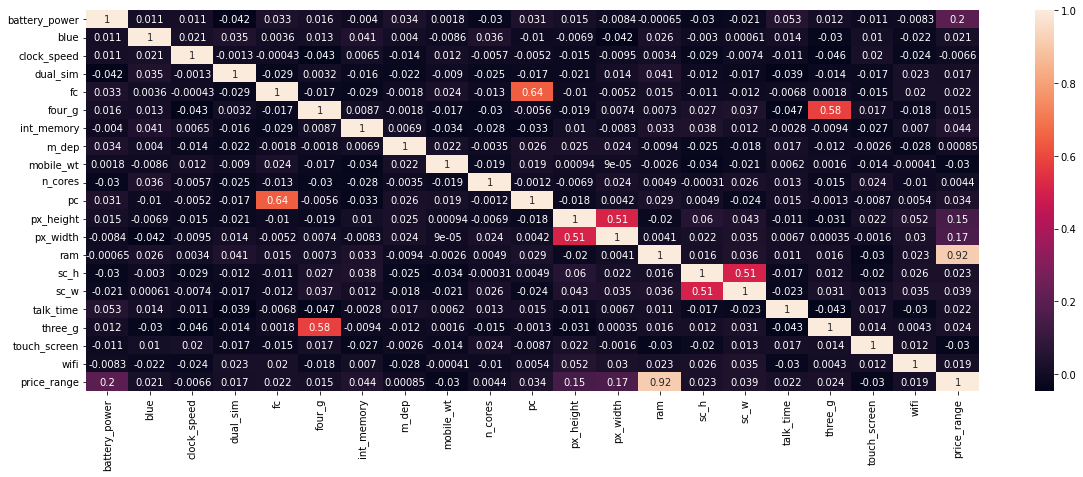

In [146]:
plt.figure(figsize=(20,7))
corr=data.corr()
sns.heatmap(corr,annot=True)
plt.show()

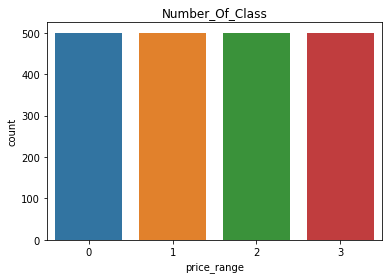

In [88]:
fig,ax=plt.subplots()
sns.countplot(x='price_range',data=data)
ax.set_title("Number_Of_Class")
plt.ylim(0)
plt.show()

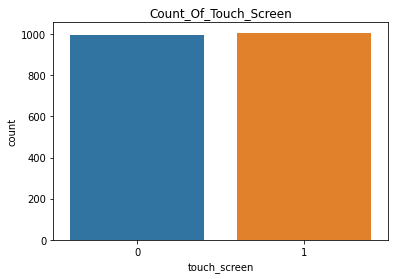

In [89]:
fig,ax=plt.subplots()
sns.countplot(x='touch_screen',data=data)
ax.set_title("Count_Of_Touch_Screen")
plt.ylim(0)
plt.show()


In [90]:
#Data for test
data_test=pd.read_csv('test.csv')

In [91]:
data_test.sample(n=5)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
261,262,1590,0,1.9,0,0,0,13,0.4,111,...,1,759,1187,2440,19,0,3,1,0,1
645,646,1923,0,0.5,0,2,1,13,0.7,147,...,4,927,1623,1868,11,6,3,1,1,0
237,238,1040,1,0.5,1,3,0,41,0.8,116,...,18,299,608,1006,12,7,18,0,0,1
290,291,1650,1,0.6,0,0,0,62,0.3,81,...,15,1305,1918,2596,5,2,10,0,0,0
666,667,687,1,2.0,1,13,1,56,0.8,131,...,19,580,736,569,18,1,6,1,1,1


In [92]:
data_test.isna().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [93]:
data_test.duplicated().any()

False

In [98]:
data_test.drop('id',axis=1,inplace=True)

In [99]:
data_test.shape

(1000, 20)

In [100]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [101]:
x.shape

(2000, 20)

In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [110]:
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.fit_transform(x_test)

In [111]:
len(x_train)

1400

In [112]:
len(x_test)

600

In [113]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [142]:
print('The Score of Logistic model Training is = {x}%'.format(x=model.score(x_train,y_train).round(5)))
print('The Score of Logistic model Testing is = {y}%'.format(y=model.score(x_train,y_train).round(5)))

The Score of Logistic model Training is = 0.97429%
The Score of Logistic model Testing is = 0.97429%


In [137]:
y_pred=model.predict(x_test)

In [138]:
cm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)

In [144]:
cm

array([[149,   2,   0,   0],
       [  9, 124,   2,   0],
       [  0,  14, 136,   1],
       [  0,   0,  17, 146]])

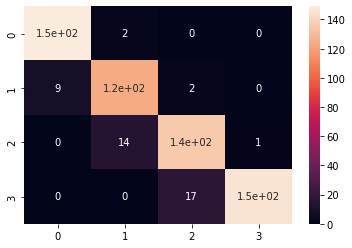

In [147]:
sns.heatmap(cm,annot=True)
plt.show()

In [143]:
cr

'              precision    recall  f1-score   support\n\n           0       0.94      0.99      0.96       151\n           1       0.89      0.92      0.90       135\n           2       0.88      0.90      0.89       151\n           3       0.99      0.90      0.94       163\n\n    accuracy                           0.93       600\n   macro avg       0.92      0.93      0.92       600\nweighted avg       0.93      0.93      0.93       600\n'